# Метод опорных векторов (англ. SVM - support vector machine)

**Замечание: в этом примере мы исследуем сам алгоритм, поэтому мы пропустим масштабирование и разбиение на обучающий и тестовый набор данных. Вместо этого мы посмотрим различные параметры, с помощью которых можно менять метод SVM (проще всего показать результаты с помощью визуализации).**

[Ссылка на статью по SVM](https://habr.com/ru/companies/ods/articles/484148/)


## Метод опорных векторов -  классификация

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Данные

Мы будем изучать следующий сценарий - медицинское исследование, в котором мышам с наличием вируса дают различные дозы двух лекарств. Через две недели смотрят, остался ли ещё вирус или нет. Цель - создать модель классификации, которая по двум измерениям дозы лекарств будет предсказывать, есть или нет вирус у мыши.

В данном примере группы хорошо отделимы друг от друга - данные специально подобраны таким образом, чтобы исследовать поведение модели SVM с различными параметрами.

In [3]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [5]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

# Классы

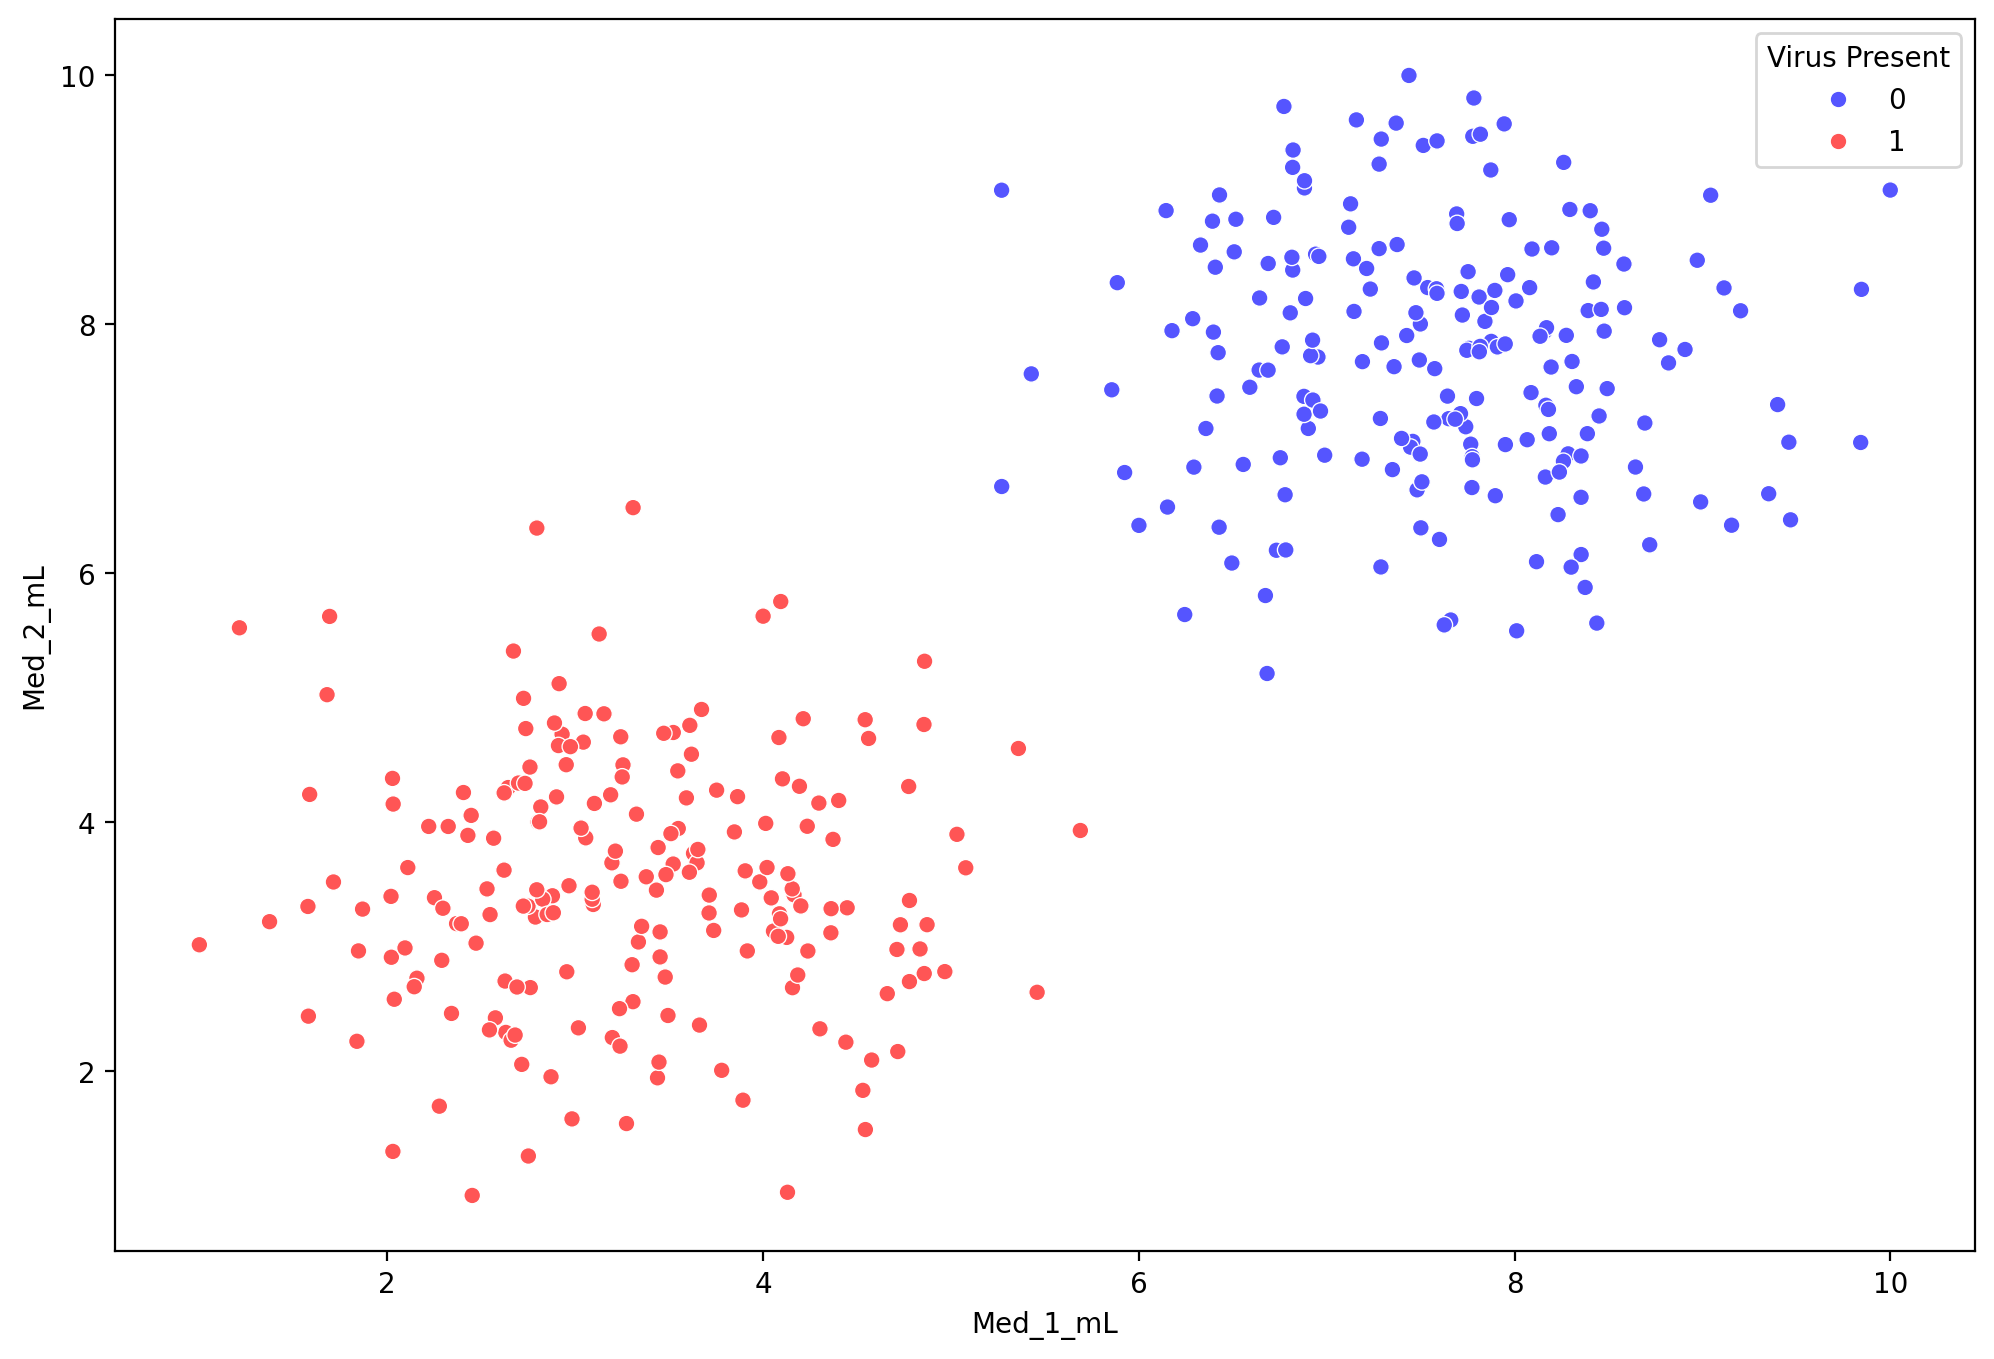

In [8]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present', palette='seismic')
plt.show()

Как видим эти два класса идеально отделимы друг от друга.

## Разделяющая гиперплоскость
Цель SVM - создать наилучшую разделяющую гиперплоскость. В двумерном пространстве это просто линия.

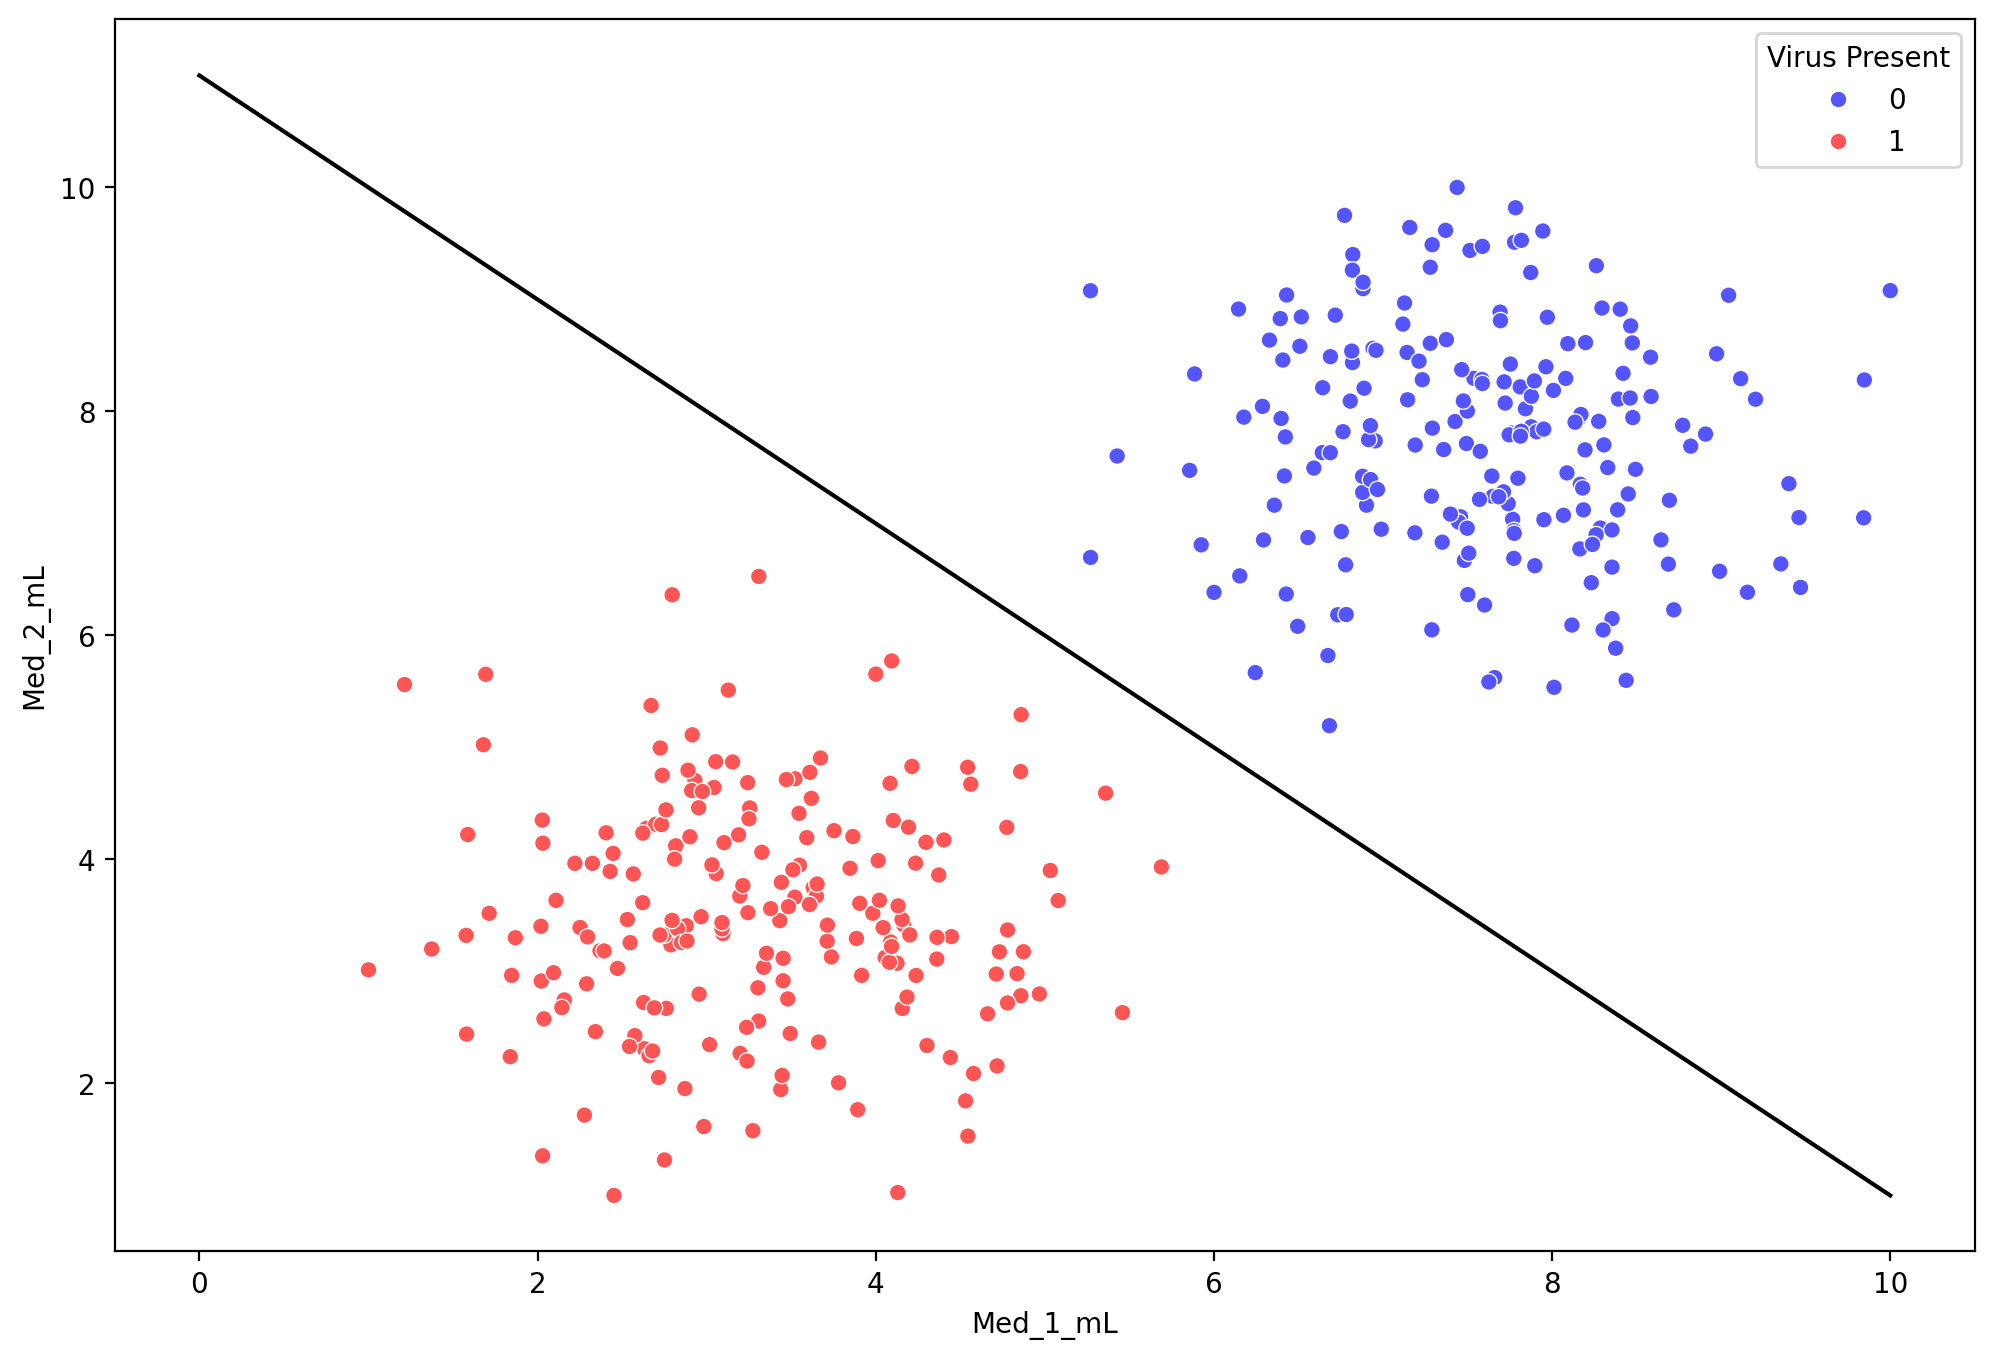

In [10]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present', palette='seismic')

# Линия(диапазон от 0 да 10 по исходному графику)
x = np.linspace(0, 10, 100)
# Значения коэффициентов, найденные с помощью
# некоторых эксперементов
m = -1
b = 11
# Построим график прямой
y = m*x + b

plt.plot(x, y, 'black')

plt.show()

Это одна из возможных линий, которая отделяет классы друг от друга.

## Метод опорных векторов(SVM)

In [12]:
from sklearn.svm import SVC

In [14]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

Параметр `C` - отвечает за регуляризацию, если мы допускаем, что некоторые точки могут быть классифицированы неправильно, то этот параметр отвечает за объём этих ошибок. Причём, здесь этот параметр вычисляется обратно пропорционально тому значению, которое было в формуле.  
Параметру `kernel` с помощью текстовых названий можно указывать различные ядра.  
В зависимости от ядра могут пригодиться параметр `degree` или параметр `gamma`.

**Замечание: в этом примере мы будем исследовать сам алгоритм, так что пока мы пропустим масштабирование данных и разбиение на обучающий и тестовый наборы данных.**

In [16]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [18]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [20]:
# Импортируем из вспомогательного .py-файла
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


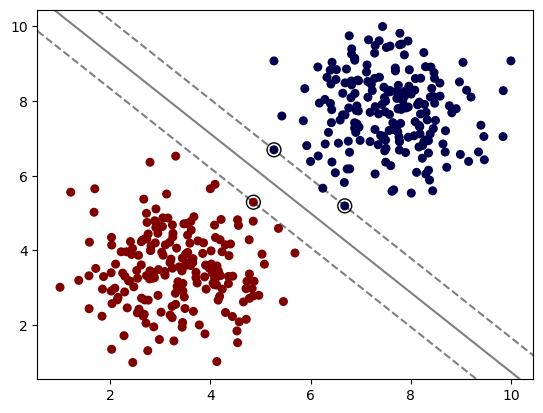

In [22]:
plot_svm_boundary(model, X, y)

Здесь мы видим разделяющую линию, зазоры, а также опорные вектора. В случае линейного ядра мы проводим линию и далее начинаем постепенно увеличивать зазоры до тех пор, пока не достигнем ближайших точек в каждом из классов. Эти точки будут опорными векторами. На графике они выделены кружочками. Здесь мы использовали высокое значение параметра C.

## Гиперпараметры
### `C`
Параметр регуляризации. Сила регуляризации обратно пропорциональна величине `C`. Очень большое значение `C` означает, что мы допускаем очень мало точек для неправильной классификации, если же указать какое-то небольшое значение `C` - то это будет означать, что мы допускаем большее количество точек для неправильной классификации, с помощью мягких зазоров. Параметр должен быть строго положительным. В качестве штрафа применяется штраф "squared l2 penalty".

In [26]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


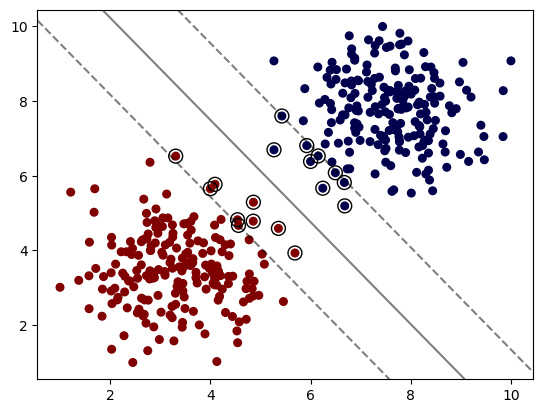

In [28]:
plot_svm_boundary(model, X, y)

По мере того, как `C` приближается к нулю - допускается всё больше точек, которые могут быть классифицированы неправильно. В итоге - получаем более широкие зазоры, внутри которых могут находиться некоторые точки. 

Значение `C` - зависит от конкретных данных, сложно сказать заранее какое число лучше выбрать. В каждом случае имеет смысл перебирать различные значения с помощью кросс-валидации и поиска по сетке, чтобы найти наилучшие значения.

### Ядро (Kernel)

[Выбираем ядро](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

### Ядро rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


Обучение модели SVM с использованием ядра "Radial Basis Function (RBF) kernel" предполагает наличие двух параметров: `C` и `gamma`. 

* Параметр `C` является общим для всех ядер SVM, с его помощью настраивается баланс между неправильной классификацией обучающих примеров и простотой разделяющей поверхности. Маленькие значения `C` делают поверхность гладкой. Большие значения `C` стараются правильно классифицировать все обучающие примеры.   
* Параметр `gamma` определяет то, какое влияние может оказывать отдельный обучающий пример. Чем больше значение gamma, тем ближе должны быть другие примеры, чтобы они тоже влияли на результат.

In [34]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)

SVC(C=1)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


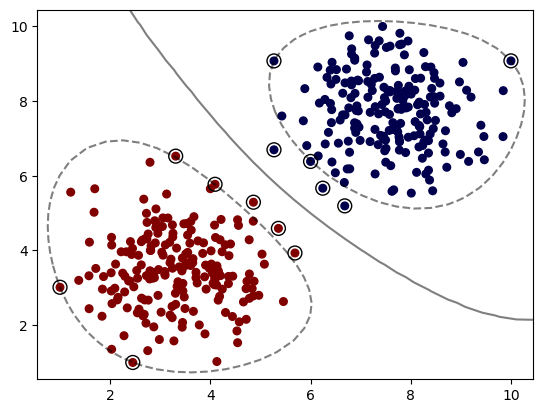

In [36]:
plot_svm_boundary(model, X, y)

Данные спроецированы в пространство большей размерности, поэтому когда мы **проецируем разделяющую гиперплоскость обратно в исходное пространство**, то это уже **не будет выглядеть как линия**. В итоге мы получим **гиперплоскость в виде некоторой кривой линии**, причём **зазоры(margins) - строятся вокруг кластеров с точками**. 

Мы получаем гиперплоскость более сложной формы и надеемся, что таким образом получится точнее отделять классы друг от друга.

In [43]:
model = SVC(kernel='rbf', C=0.1)
model.fit(X, y)

SVC(C=0.1)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


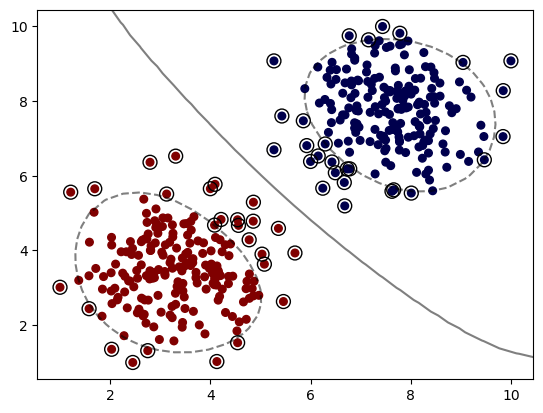

In [45]:
plot_svm_boundary(model, X, y)

### `gamma`
`gamma` : {'scale', 'auto'} или float, по умолчанию='scale'
Коэффициент ядра для 'rbf', 'poly' или 'sigmoid'.

    - если ``gamma='scale'`` (по умолчанию), то в качестве значения гамма используется
      1 / (n_features * X.var()),
    - если 'auto', то используется значение 1 / n_features.

In [49]:
model = SVC(kernel='rbf', C=1, gamma='auto')
model.fit(X, y)

SVC(C=1, gamma='auto')

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


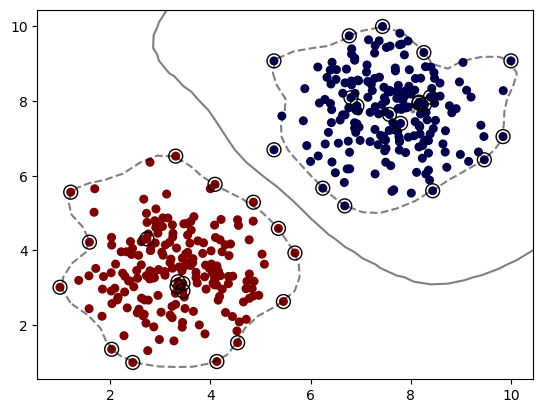

In [51]:
plot_svm_boundary(model, X, y)

Модель становится намного более чувствительной к шуму в данных на опорных векторах. По сути `gamma` влияет на то, насколько сильно каждая отдельная точка влияет на результат. Значит, чем больше значение `gamma`, тем ближе должны быть другие точки для того, чтобы влияние той или иной точки было заметно.

In [54]:
model = SVC(kernel='rbf', C=1, gamma=0.9)
model.fit(X, y)

SVC(C=1, gamma=0.9)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


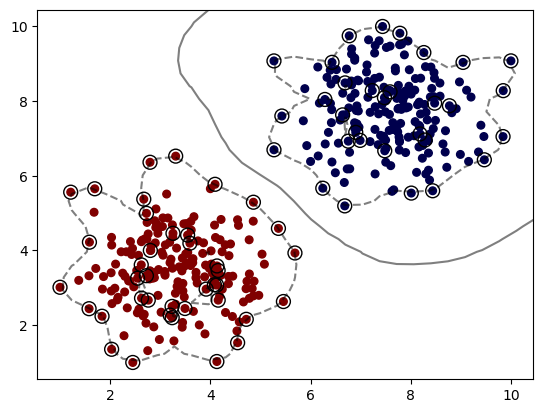

In [56]:
plot_svm_boundary(model, X, y)

In [58]:
model = SVC(kernel='rbf', C=1, gamma=2)
model.fit(X, y)

SVC(C=1, gamma=2)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


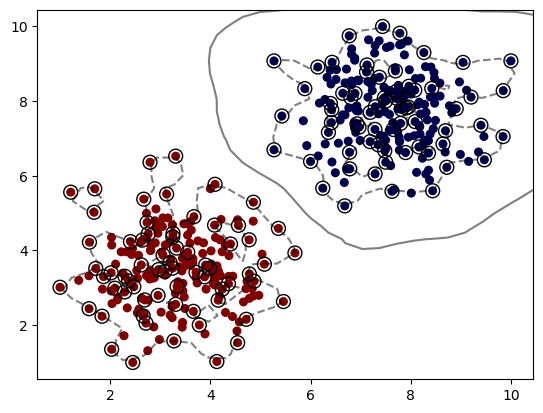

In [60]:
plot_svm_boundary(model, X, y)

По сути мы извлекаем из данных слишком много информации и наша модель получается переобученной. 

Хорошее значение для `gamma` - это scale, оно позволяет соблюсти хороший баланс между смещением и дисперсией. Мы уменьшаем значение информации, извлекаемое из опорных векторов.

In [63]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X, y)

SVC(C=1)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


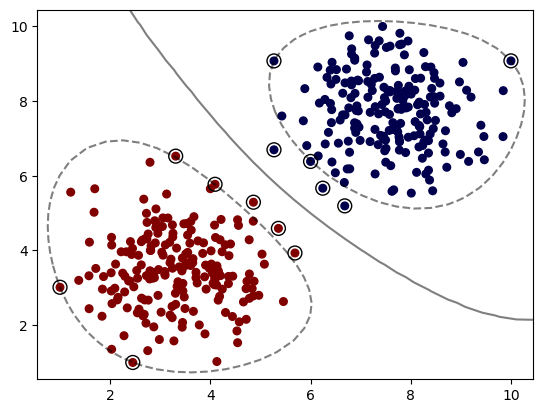

In [65]:
plot_svm_boundary(model, X, y)

### Ядро sigmoid
Для наших данных покажет не очень хорошие результаты

In [70]:
model = SVC(kernel='sigmoid')
model.fit(X, y)

SVC(kernel='sigmoid')

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


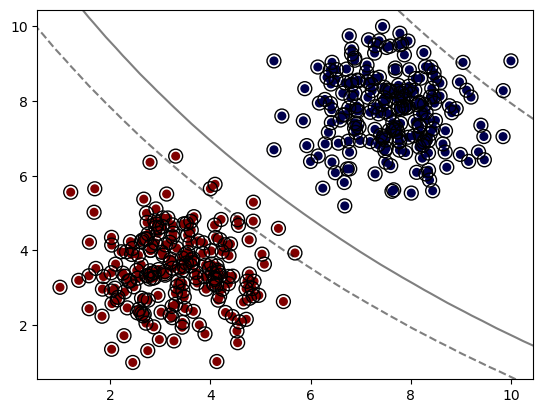

In [72]:
plot_svm_boundary(model, X, y)

Почти все точки находятся между зазором и разделяющей кривой. В этой задачи применение sigmoid не является целесообразным, но вообще - это ядро можно добавить в список вариантов, когда мы перебираем различные варианты параметров с помощью поиска по сетке.

Но во многих случаях имеет смысл сначала попробовать ядро **rbf** и для него различные параметр `C` и `gamma`, и только потом переходить к ядру **sigmoid**. Всё зависит от конкретных данных.

### Ядро poly

Параметр `degree` (только для полиноминальных ядер) - степень полиноминальной функции ядра ('poly'). Игнорируется всеми другими ядрами.

In [77]:
model = SVC(kernel='poly', degree=1)
model.fit(X, y)

SVC(degree=1, kernel='poly')

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


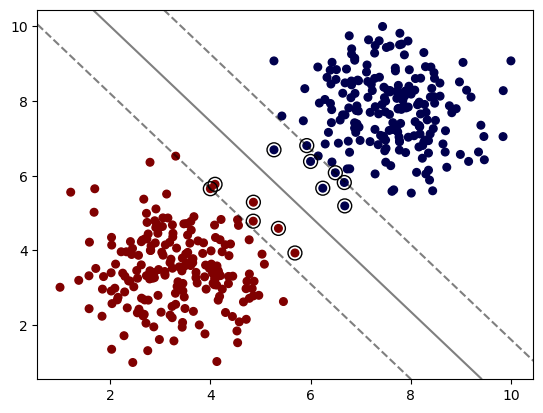

In [79]:
plot_svm_boundary(model, X, y)

Мы получаем линию, потому что `degree` = 1 - это линия.

In [82]:
model = SVC(kernel='poly', degree=2)
model.fit(X, y)

SVC(degree=2, kernel='poly')

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


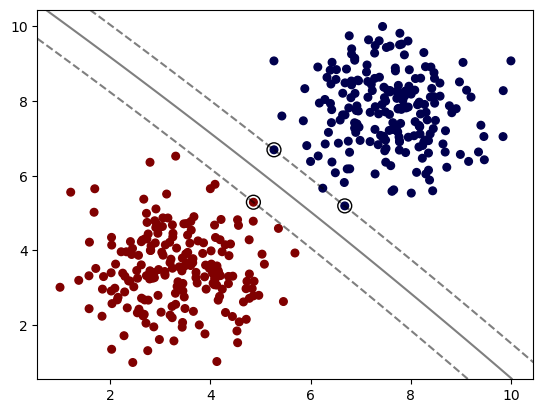

In [84]:
plot_svm_boundary(model, X, y)

Теперь это немного изогнутая кривая.

In [89]:
model = SVC(kernel='poly', C=0.05, degree=4)
model.fit(X, y)

SVC(C=0.05, degree=4, kernel='poly')

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


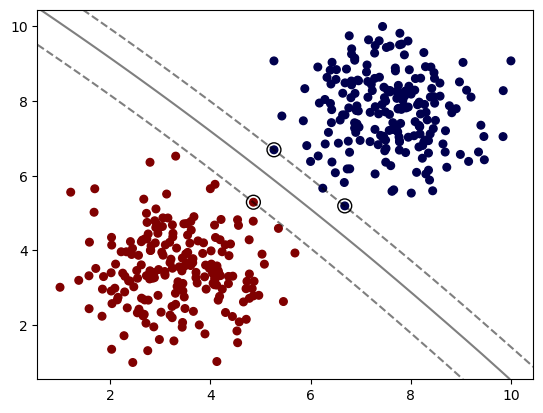

In [91]:
plot_svm_boundary(model, X, y)

## Поиск по сетке

В этом простом примере классы легко отделялись друг от друга. Это значит, что различные варианты модели могут давать 100% точность, и поиск по сетке может быть излишним.

In [96]:
from sklearn.model_selection import GridSearchCV

In [98]:
svm = SVC()

In [100]:
param_grid = {'C':[0.01, 0.1, 1], 'kernel':['linear', 'rbf']}

In [102]:
grid = GridSearchCV(svm, param_grid)

In [104]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [106]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [108]:
grid.best_score_

1.0